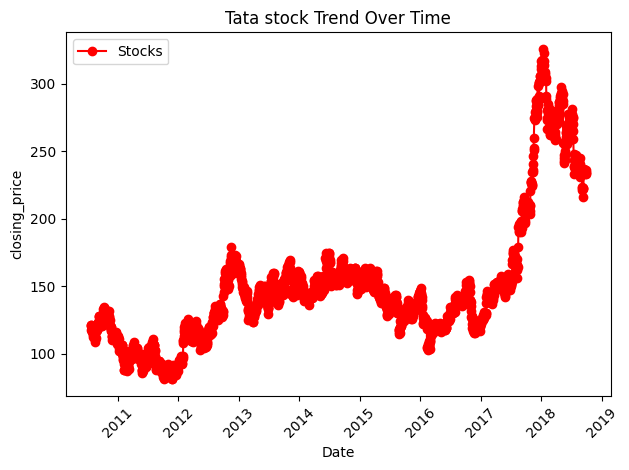

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]
(612, 100)
(612,)
(1221, 100)
(1221,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 13s

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import pandas as pd
import matplotlib.pyplot as plt



# In[40]:


data = pd.read_csv('/content/stock.csv')


# In[41]:


data


# In[24]:


close_data=data['Close']


# In[25]:


close_data


# In[35]:


# Convert dates to datetime objects
date_objects = pd.to_datetime(data['Date'])


# In[47]:


time = pd.DataFrame(date_objects)


# In[48]:


time


# In[57]:


# Create a line chart
plt.plot(time['Date'], data['Close'], marker='o', linestyle='-', color='r', label='Stocks')


plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('closing_price')
plt.title('Tata stock Trend Over Time')

plt.legend()

plt.tight_layout()
plt.show()


# In[58]:


import numpy as np


# In[61]:


from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(close_data).reshape(-1,1))


# In[65]:


df1.shape


# In[67]:


print(df1)


# In[68]:


#Splitting data into train test split


# In[87]:


training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[:training_size,:],df1[training_size:len(df1),:1]


# In[113]:


def create_dataset(dataset,time_step):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)


# In[129]:


X_train,y_train=create_dataset(train_data,100)


# In[130]:


X_test,y_test=create_dataset(test_data,100)


# In[132]:


print(X_test.shape),print(y_test.shape)


# In[133]:


print(X_train.shape),print(y_train.shape)


# In[138]:


#reshape input to be [samples , time_step, features] which is required for LSTM
X_train =  X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test  =  X_test.reshape(X_test.shape[0],X_test.shape[1], 1)


# In[141]:


#create stacked LSTM model


# In[143]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# In[144]:


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


# In[146]:


model.summary()


# In[147]:


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


# In[148]:




# In[ ]:






In [1]:
pwd

'/content'

In [19]:

train_predict = model.predict(X_train)


# In[150]:


test_predict = model.predict(X_test)

20/20 [==============================] - 0s 5ms/step


In [20]:
train_predict

array([[0.8553332 ],
       [0.8689326 ],
       [0.8591212 ],
       ...,
       [0.26998863],
       [0.2678523 ],
       [0.26157594]], dtype=float32)

In [21]:
test_predict

array([[0.3377952 ],
       [0.32646403],
       [0.32117823],
       [0.31946942],
       [0.32069203],
       [0.32348666],
       [0.32598892],
       [0.33104515],
       [0.33893123],
       [0.3441691 ],
       [0.34636173],
       [0.35222074],
       [0.3555059 ],
       [0.36362422],
       [0.36552227],
       [0.36973715],
       [0.3672805 ],
       [0.35519126],
       [0.34571525],
       [0.3438186 ],
       [0.35022932],
       [0.35161006],
       [0.3435787 ],
       [0.33698466],
       [0.3351922 ],
       [0.3359243 ],
       [0.3305503 ],
       [0.32679975],
       [0.3224022 ],
       [0.32907894],
       [0.35480365],
       [0.38689962],
       [0.3899392 ],
       [0.37335917],
       [0.35923684],
       [0.35077882],
       [0.33332998],
       [0.3180032 ],
       [0.31320328],
       [0.314244  ],
       [0.31958407],
       [0.30678406],
       [0.2931698 ],
       [0.28156674],
       [0.2812017 ],
       [0.29140228],
       [0.304953  ],
       [0.318

In [23]:
len(y_train),len(train_predict)

(1221, 1221)

In [24]:
len(y_test),len(test_predict)

(612, 612)

In [15]:
#calculate RMSE values

In [16]:
import math

In [17]:
from sklearn.metrics import mean_squared_error

In [25]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.015149189483935442

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.0145512647187877

In [43]:
train_predict=scalar.inverse_transform(train_predict)
test_predict =scalar.inverse_transform(test_predict)

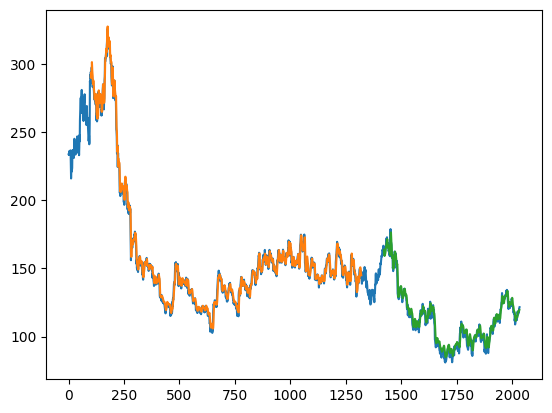

In [44]:
##plotting
#shift train prediction for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
#plot baseline and prediction
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()